In [23]:
import pdfplumber
import re
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
%config InlineBackend.figure_format = 'svg'

In [24]:
x0 = 0    # Distance of left side of character from left side of page.
x1 = 0.4  # Distance of right side of character from left side of page.
y0 = 0  # Distance of bottom of character from bottom of page.
y1 = 1  # Distance of top of character from bottom of page.


# file = pdfplumber.open('Kenneth M Hoffman, Ray Kunze - Linear Algebra -Prentice Hall (1971).pdf')
file = pdfplumber.open('Linear Algebra, 2Nd Edition - Kenneth Hoffmann And Ray Kunze.pdf')

node_list = []

for x in range(400,415):
    all_content = []
    page = file.pages[x]
    
    width = page.width
    height = page.height

    # Crop pages
    left_bbox = (0*float(width), y0*float(height), x1*float(width), y1*float(height))
    page_crop = page.crop(bbox=left_bbox)
    left_text = page_crop.extract_text()

    right_bbox = (x1*float(width), y0*float(height), 1*float(width), y1*float(height))
    page_crop = page.crop(bbox=right_bbox)
    right_text = page_crop.extract_text()
    page_context = '\n'.join([left_text, right_text])
    all_content.append(page_context)

    text_=all_content#.extract_text()

    if 'Index' in text_[0]:
        new_text_ = text_[0].split(',')
        new_text_ = list(new_text_)

        for y in range(len(new_text_)):
            if new_text_[y].isdigit():
                pass
            else:
                result = ''.join([i for i in new_text_[y] if not i.isdigit()])
                node_list.append(result.replace('\n',''))

node_list = [name for name in node_list if name.strip()]
node_list = [name.lstrip() for name in node_list]
node_list = [name for name in node_list if name[0].isupper()]

# node_list

In [25]:
for i,node in enumerate(node_list):
    node = ' '.join( [w for w in node.split() if len(w)>1] )
    node = node.split(':')
    node = node[0].replace('Index ','')
    node_list[i] = node

In [27]:

all_sections=[]

for x in range(5,8):
    
    text_ = file.pages[x].extract_text()
    text_list = text_.split('\n')
    text_list_new = []
    for line_ in range(len(text_list)):
        
        text=text_list[line_]
        
        if (text[0].isdigit()) and (text.rstrip()[-1].isdigit()):
            text_list_new.append(text)
        elif (text[0].isdigit()) and ((line_+1)<=(len(text_list)-1)):
            text_list_new.append(text+text_list[line_+1])
#         if '8.4' in text:
#             print(text,'\n conditions-\n',text[0].isdigit() and text.rstrip()[-1].isdigit(),'\n',text+text_list[line_+1])
#             print(text_list[line_+1])
            
#     text_list_new = [text.rstrip('1234567890') for text in text_list_new]
    text_list_new=[x for x in text_list_new if len(x)>5]
    all_sections=all_sections+(text_list_new)
all_sections=[x[0:len(x)-4].lower().rstrip() for x in all_sections]
# all_sections=[x.split('.')[-1].lstrip() for x in all_sections]
all_sections= [re.sub('\s+',' ',x) for x in all_sections]
all_sections=[x.split('.')[-1].lstrip() for x in all_sections]
all_sections= [re.sub(r'[0-9]+', '', x) for x in all_sections]
all_sections=[x.lstrip() for x in all_sections]



['fields',
 'systems of linear equations',
 'matrices and elementary row operations',
 'row-reduced echelon matrices',
 'matrix multiplication',
 'invertible matrices',
 'vector spaces',
 'subspaces',
 'bases and dimension',
 'coordinates',
 'summary of row-equivalence',
 'computations concerning subspaces',
 'linear transformations',
 'the algebra of linear transformations',
 'isomorphism',
 'representation of transformations by matrices',
 'linear functionals',
 'the double dual',
 'the transpose of a linear transformation',
 'algebras',
 'the algebra of polynomials',
 'lagrange interpolation',
 'polynomial ideals',
 'the prime factorization of a polynomial',
 'commutative rings',
 'determinant functions',
 'permutations and the uniqueness of determinants',
 'additional properties of determinants',
 'modules',
 'multilinear functions',
 'the grassman ring',
 'introduction',
 'characteristic values',
 'annihilating polynomials',
 'invariant subspaces',
 'simultaneous triangulation; si

: 

: 

In [6]:
all_sections=[x.split('.')[-1].lstrip() for x in all_sections]

it_section=0
dict_section_page_line={}

for x in range(8,394):
    text_=file.pages[x].extract_text()
    text_=text_.lower()
    text_list = text_.split('\n')
#     x=text_list[1]
    xx=[x.split('.') for x in text_list]
    text_new=[y[-1].rstrip().lstrip() for y in xx]
    text_new=[re.sub('\s+',' ',x) for x in text_new]
    line_num=np.where(all_sections[it_section]== np.array(text_new))[0]
    
    
    if line_num.shape[0]>0:
#         print(it_section)
        dict_section_page_line[str(it_section)+'.'+all_sections[it_section]]= [x,line_num]
        it_section=it_section+1
    else:
        for it__ in range(len(text_new)-2):
            joined_=text_new[it__]+' '+text_new[it__+1]
            if x==13:
                print(joined_)
            if re.sub('\s+',' ',joined_)==all_sections[it_section]:
                line_num=it__
                dict_section_page_line[str(it_section)+'.'+all_sections[it_section]]= [x,line_num]
                it_section=it_section+1
                break
        for it__ in range(len(text_new)-1):
            joined_=text_new[it__]
#             if x==13:
#                 print(joined_)
            if re.sub('\s+',' ',joined_).replace(' ','')==all_sections[it_section].replace(' ',''):
                line_num=it__
                dict_section_page_line[str(it_section)+'.'+all_sections[it_section]]= [x,line_num]
                it_section=it_section+1
                break

    if it_section==len(all_sections):
        break


1 matrices and elementary
matrices and elementary row operations


In [7]:
for key in dict_section_page_line.keys():
    if type(dict_section_page_line[key][1])==np.ndarray:

        dict_section_page_line[key][1]=dict_section_page_line[key][1][0]

In [8]:
dict_section_text={}
page_nums=[]
for key in dict_section_page_line.keys():
    page_nums.append(dict_section_page_line[key][0])
text_section=[]    
section_names=list(dict_section_page_line.keys())
it_section=0
for x in range(8,394):
    
    text_=file.pages[x].extract_text()
    text_=text_.lower()
    text_list = text_.split('\n')
    
    if (x in page_nums) and x>8:
        it_section=it_section+1
        key=section_names[it_section]
#         print('line_num-----',dict_section_page_line[key][1])
        text_section.append(text_list[1:dict_section_page_line[key][1]])
        dict_section_text[section_names[it_section-1]]=text_section
        text_section=text_list[dict_section_page_line[key][1]:-1]
    else:
        text_section.append(text_list[1:-1])

In [9]:
dict_section_textcombined=dict_section_text.copy()
for k in dict_section_text.keys():
#     print(dict_section_text[k],'\n\n')
    text_combined='  '
    y=' '
    
    for xx in dict_section_text[k]:
        for x in xx:
            if text_combined[-2]=='-':
                text_combined=text_combined[0:-2]+x
            else:
                text_combined=text_combined+x
    dict_section_textcombined[k]=text_combined

In [10]:
# dict_section_keywords_line_no = {keyword: {section: [line_numbers_within_section]}}
def dict_text_to_dict_keyword(temp_dict_text):

    temp_dict_section_keywords_line_no={}

    glossary_words=node_list.copy()
    it_gloss=0
    for x in glossary_words:
        print(it_gloss,'==',x,end='\r')
        it_gloss=it_gloss+1
        x_key=x
        x=x.split(' ')

        temp_dict_section_keywords_line_no[x_key]={}

        for k in temp_dict_text.keys():
            temp_dict_section_keywords_line_no[x_key][k]=[]
            search_text=temp_dict_text[k]
            search_text=[x for x in search_text.split(' ') if x!='']
            for it in range(len(search_text)-1):
                if [s.lower() for s in x] == search_text[it:it+len(x)]:
                    (temp_dict_section_keywords_line_no[x_key][k]).append(it)

    return temp_dict_section_keywords_line_no

In [11]:
def simpleaxis(ax,xlab_,ylab_):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xlabel(xlab_,fontsize=12) 
    ax.set_ylabel(ylab_,fontsize=12)        


#### Split the section text dictionary into two parts -- only section and only exercise

In [12]:
dict_only_section_textcombined, dict_only_exercise_textcombined = (dict_section_textcombined.copy() for x in range(2))

for key, value in dict_section_textcombined.items():
    full_text = dict_section_textcombined[key]
    
    if 'exercises 1.' in full_text:
        split_text = full_text.split('exercises 1.',1)
        dict_only_section_textcombined[key] = split_text[0]
        dict_only_exercise_textcombined[key] = split_text[1]

    else:
        dict_only_exercise_textcombined[key] = ''


In [13]:
dict_section_keywords_line_no = dict_text_to_dict_keyword(dict_section_textcombined)
# dict_only_section_keywords_line_no = dict_text_to_dict_keyword(dict_only_section_textcombined)
# dict_only_exercise_keywords_line_no = dict_text_to_dict_keyword(dict_only_exercise_textcombined)

In [14]:
plot_keywords = rnd.sample(list(dict_section_keywords_line_no.keys()),k=20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


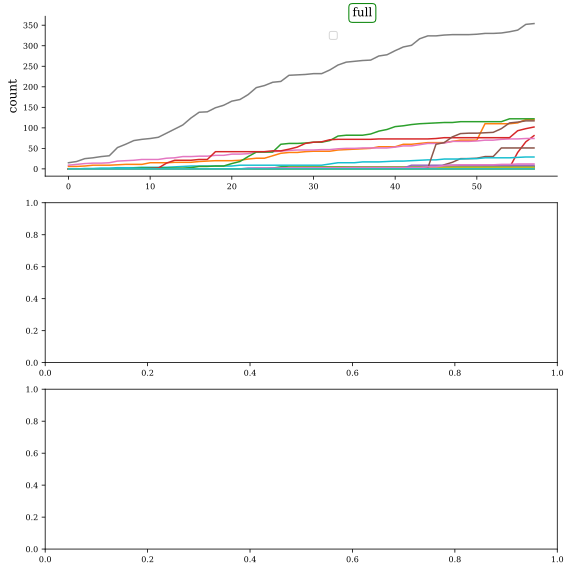

In [19]:
fig,ax = plt.subplots(3,1,figsize=(8,8))
ax = ax.flatten()

xlab_='section number'
ylab_='count'


dict_list = [dict_section_keywords_line_no]#,dict_only_section_keywords_line_no,dict_only_exercise_keywords_line_no]
dict_names = ['full','only-section','only exercise']
for i, dictionary, name in zip(range(3),dict_list,dict_names):
    for k in range(20):
        temp_keyword_page = (list((dictionary[plot_keywords[k]]).values()))
        temp_keyword_page = np.cumsum([len(x) for x in temp_keyword_page])

        if i ==2:
            simpleaxis(ax[i],xlab_,ylab_)
            ax[i].plot(range(len(temp_keyword_page)),temp_keyword_page,label=plot_keywords[k])
        else:
            simpleaxis(ax[i],'',ylab_)
            ax[i].plot(range(len(temp_keyword_page)),temp_keyword_page)

    ax[i].text(0.6,1.0,name,fontsize=12, bbox=dict(facecolor='none', edgecolor='green', boxstyle='round'), transform = ax[i].transAxes)


fig.legend(ncol=2,bbox_to_anchor=(0.6,0.95),fontsize=10)
plt.tight_layout()
plt.savefig('keyword_section_exercise_Linear_Algebra.pdf')


In [21]:
node_list

['Adjoint',
 'Admissible sltbspace',
 'Algebra',
 'Algebraically closed field',
 'Alternating n-linear function',
 'Annihilator',
 'Approximation',
 'Associativity',
 'Augmented matrix',
 'Axiom of choice',
 'Basis',
 'Bessel’s inequality',
 'Bilinear form',
 'Cauchy-Schwars inequality',
 'Cayley-Hamilton theorem',
 'Cayley transform',
 'Classical adjoint',
 'Coefficients of polynomial',
 'Cofactor',
 'Column',
 'Commutative',
 'Companion matrix',
 'Complementary subspace',
 'Composition',
 'Conductor',
 'Congruence',
 'Conjugate',
 'Conjugation',
 'Coset',
 'Cramer’s rule',
 'Cyclic',
 'Degree',
 'Dependence',
 'Derivative of polynomial',
 'Determinant function',
 'Determinant rank',
 'Diagonalization',
 'Differential equations',
 'Direct sum',
 'Disjoint subspaces (see Independent',
 'Dual',
 'Eigenvalue (see Characteristic',
 'Jordan matrix',
 'Empty set',
 'Entries of matrix',
 'Equiva',
 'Equivalent systems of equations',
 'Euclidean space',
 'Exterior (wedge) product',
 'F”',
 'F